In [73]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon, reciprocal
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

LUCKY_NUMBER = 14

# Read in data

1. Read in the csv using pandas
2. Display first few lines
3. Show no irregularities (NaN) in content
4. Describe dataset
5. Show correlation scatterplots
6. Show correlation to charges
7. Show individiul correlation scatterplots

In [74]:
medical_csv = pd.read_csv("insurance.csv")
medical_csv.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
medical_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [76]:
medical_csv.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


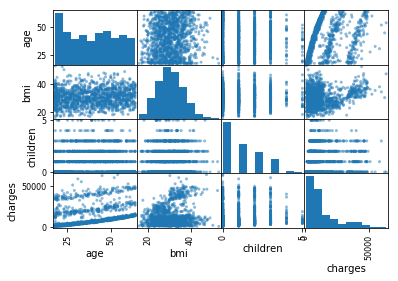

In [77]:
scatter_matrix = pd.plotting.scatter_matrix(medical_csv)

In [78]:
corr_matrix = medical_csv.corr()
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

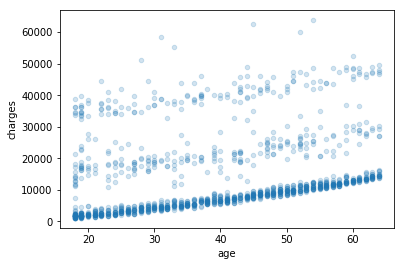

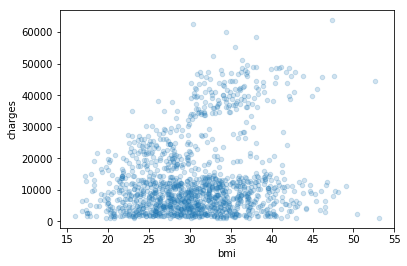

In [79]:
medical_csv.plot(kind="scatter", x="age", y="charges", alpha=0.2) #very linear
medical_csv.plot(kind="scatter", x="bmi", y="charges", alpha=0.2) #relatively flat with many anomalies

# Split the data into testing and training sets
1. Split 80-20
2. drop the "charges" for label on each

In [80]:
medical_train, medical_test = train_test_split(medical_csv, test_size=0.2, random_state=LUCKY_NUMBER)

In [81]:
train_labels = medical_train["charges"]
medical_train = medical_train.drop("charges", axis=1)

In [82]:
test_labels = medical_test["charges"]
medical_test = medical_test.drop("charges", axis=1)

# Create Pipeline for Data
1. Encode string categories "sex", "smoker", and "region"
2. Use standard scaler to adjust numerical 

In [83]:
cat_attribs = ["sex", "smoker", "region"]
cat_pipeline = Pipeline([
    ("cat", OneHotEncoder()),
])

In [84]:
medical_num = medical_train.drop(cat_attribs, axis=1)
num_attribs = list(medical_num)
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [85]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
medical_prepared = full_pipeline.fit_transform(medical_train)
#medical_prepared

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
medical_prepared = full_pipeline.fit_transform(medical_train)
test_prepared = full_pipeline.fit_transform(medical_test)

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Implement Linear Regression and RandomForest
1. Try Linear Regression
2. Try RandomForestRegressor
3. Compare results using both mean squared error and mean absolute error
    a. Because there are so many outliers (see the above scatterplots) and very little correlation, we believe this is the cause for a significantly higher mean error in mean squared error

In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(medical_prepared, train_labels)
#print(train_labels.shape[0] == medical_prepared.shape[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
medical_scores = cross_val_score(lin_reg, medical_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
medical_rmse_scores = np.sqrt(-medical_scores)
display_scores(medical_rmse_scores)

Scores: [5335.08791546 7224.74194826 5833.97594094 6700.21378488 6387.80005864
 5906.947039   5277.70866593 6025.23009352 5497.53322574 6424.02300739]
Mean: 6061.326167974554
Standard deviation: 594.6438179187575


In [90]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=LUCKY_NUMBER)
forest_reg.fit(medical_prepared, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=14, verbose=0, warm_start=False)

In [91]:
medical_scores = cross_val_score(forest_reg, medical_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
medical_rmse_scores = np.sqrt(-medical_scores)
display_scores(medical_rmse_scores)

Scores: [4539.08541501 5925.49792221 4263.95440676 5665.60876324 4628.37930656
 4864.8198559  5002.04225785 4728.93199618 3547.69488113 5750.10022071]
Mean: 4891.61150255385
Standard deviation: 695.5576381576351


In [92]:
svm_reg = SVR(kernel='linear',C= 1000.,gamma= 0.03)
svm_reg.fit(medical_prepared, train_labels)
scores = cross_val_score(svm_reg, medical_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
#forest_rmse_scores = np.sqrt(-scores)
display_scores(np.sqrt(-scores))

Scores: [5530.43903441 7448.93834557 6140.16175347 7991.058523   8135.69704777
 6377.81077281 5795.60584977 6273.64771135 5708.45224741 6974.47655011]
Mean: 6637.628783568043
Standard deviation: 899.631706294333


# Grid search to fine tune model
    We are doing the grid search on random forest because preliminary results show that it is doing better than the linear regression model (4243 vs 2821)

In [120]:
param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4, 6 ,8, 10]},
  ]

forest_reg = RandomForestRegressor(random_state=LUCKY_NUMBER)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(medical_prepared, train_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=14, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [121]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

4784.585774044499

In [122]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [116]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(medical_prepared, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   10.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [102]:
error = np.sqrt(-grid_search.best_score_)
error

3343.491715280616

# Try Randomized Grid Search

In [117]:
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
svr_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=LUCKY_NUMBER)
svr_rnd_search.fit(medical_prepared, train_labels)
np.sqrt(-svr_rnd_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.3min finished


4962.134238114192

In [123]:
svr_rnd_search.best_params_

{'C': 70987.16355463809, 'gamma': 0.08702864373843386, 'kernel': 'rbf'}

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=LUCKY_NUMBER)
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=LUCKY_NUMBER)
forest_rnd_search.fit(medical_prepared, train_labels)
np.sqrt(-forest_rnd_search.best_score_)

4819.715062416688

In [124]:
forest_rnd_search.best_params_

{'max_features': 7, 'n_estimators': 157}

In [106]:
feature_importances = forest_rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.14018437, 0.19268337, 0.02122555, 0.00438779, 0.00438966,
       0.32264126, 0.29587015, 0.00535688, 0.00478142, 0.00510204,
       0.00337754])

In [107]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(["sex", "smoker", "region"])
attributes = num_attribs+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32264126432790735, 'region'),
 (0.19268336708958728, 'bmi'),
 (0.14018436555855934, 'age'),
 (0.021225546478752744, 'children'),
 (0.004389655249905842, 'smoker'),
 (0.004387789344266437, 'sex')]

# Test Final Model

In [126]:
final_model = forest_rnd_search.best_estimator_

final_predictions = final_model.predict(test_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
np.sqrt(final_mse)

4481.682556385083

1906.7987178743